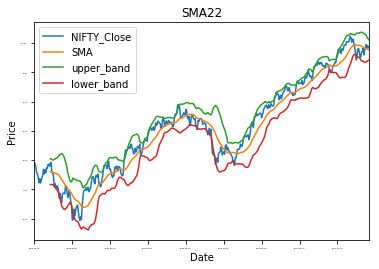

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def get_data(filename):
    base_dir = "data"
    cwd = os.getcwd()
    path = os.path.join(cwd, base_dir, filename)
    dfstocks = pd.read_csv(path, index_col = "Unnamed: 0")
    return dfstocks

def bollinger_band(df, period):
    sma = df.rolling(window=period,center=False).mean()
    std = df.rolling(window=period,center=False).std()
    two_std = 2*std
    upper_band = sma + two_std
    lower_band = sma - two_std
    df['SMA'] = sma
    df['upper_band'] = upper_band
    df['lower_band'] = lower_band
    #mean = pd.rolling_mean(df, 22)
    return df


def write_data(data, outfile):
    base_dir = "data"
    cwd = os.getcwd()
    path = os.path.join(cwd, base_dir, outfile)
    data.to_csv(path)


def plot_data(data, title = "SMA22"):
    ax = data.plot(title = title, fontsize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def analyze():
    filename = "ClosePriceAll.csv"
    dfstocks = get_data(filename)
    dfnifty = dfstocks['NIFTY.csv']
    dfnifty = dfnifty.to_frame()
    dfnifty.rename( columns={'NIFTY.csv':'NIFTY_Close'}, inplace=True)
    dfnifty = bollinger_band(dfnifty, period = 22)
    write_data(dfnifty, 'BollingerBandNifty.csv')
    plot_data(dfnifty)
    
    
if __name__ == "__main__":
    analyze()
